<a href="https://colab.research.google.com/github/Natthaphatz007/Python_dataviz2024/blob/main/final_dataviz_2024_%E0%B8%93%E0%B8%B1%E0%B8%90%E0%B8%A0%E0%B8%B1%E0%B8%97%E0%B8%A3_%E0%B8%97%E0%B8%B1%E0%B8%81%E0%B8%A9%E0%B8%B4%E0%B8%93_653020568_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Exam ณัฐภัทร ทักษิณ 653020568-5

## 0 Preprocess

In [4]:
import pandas as pd
import polars as pl
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/data_viz_2024_DATA/Xnn_ppm.pickle'

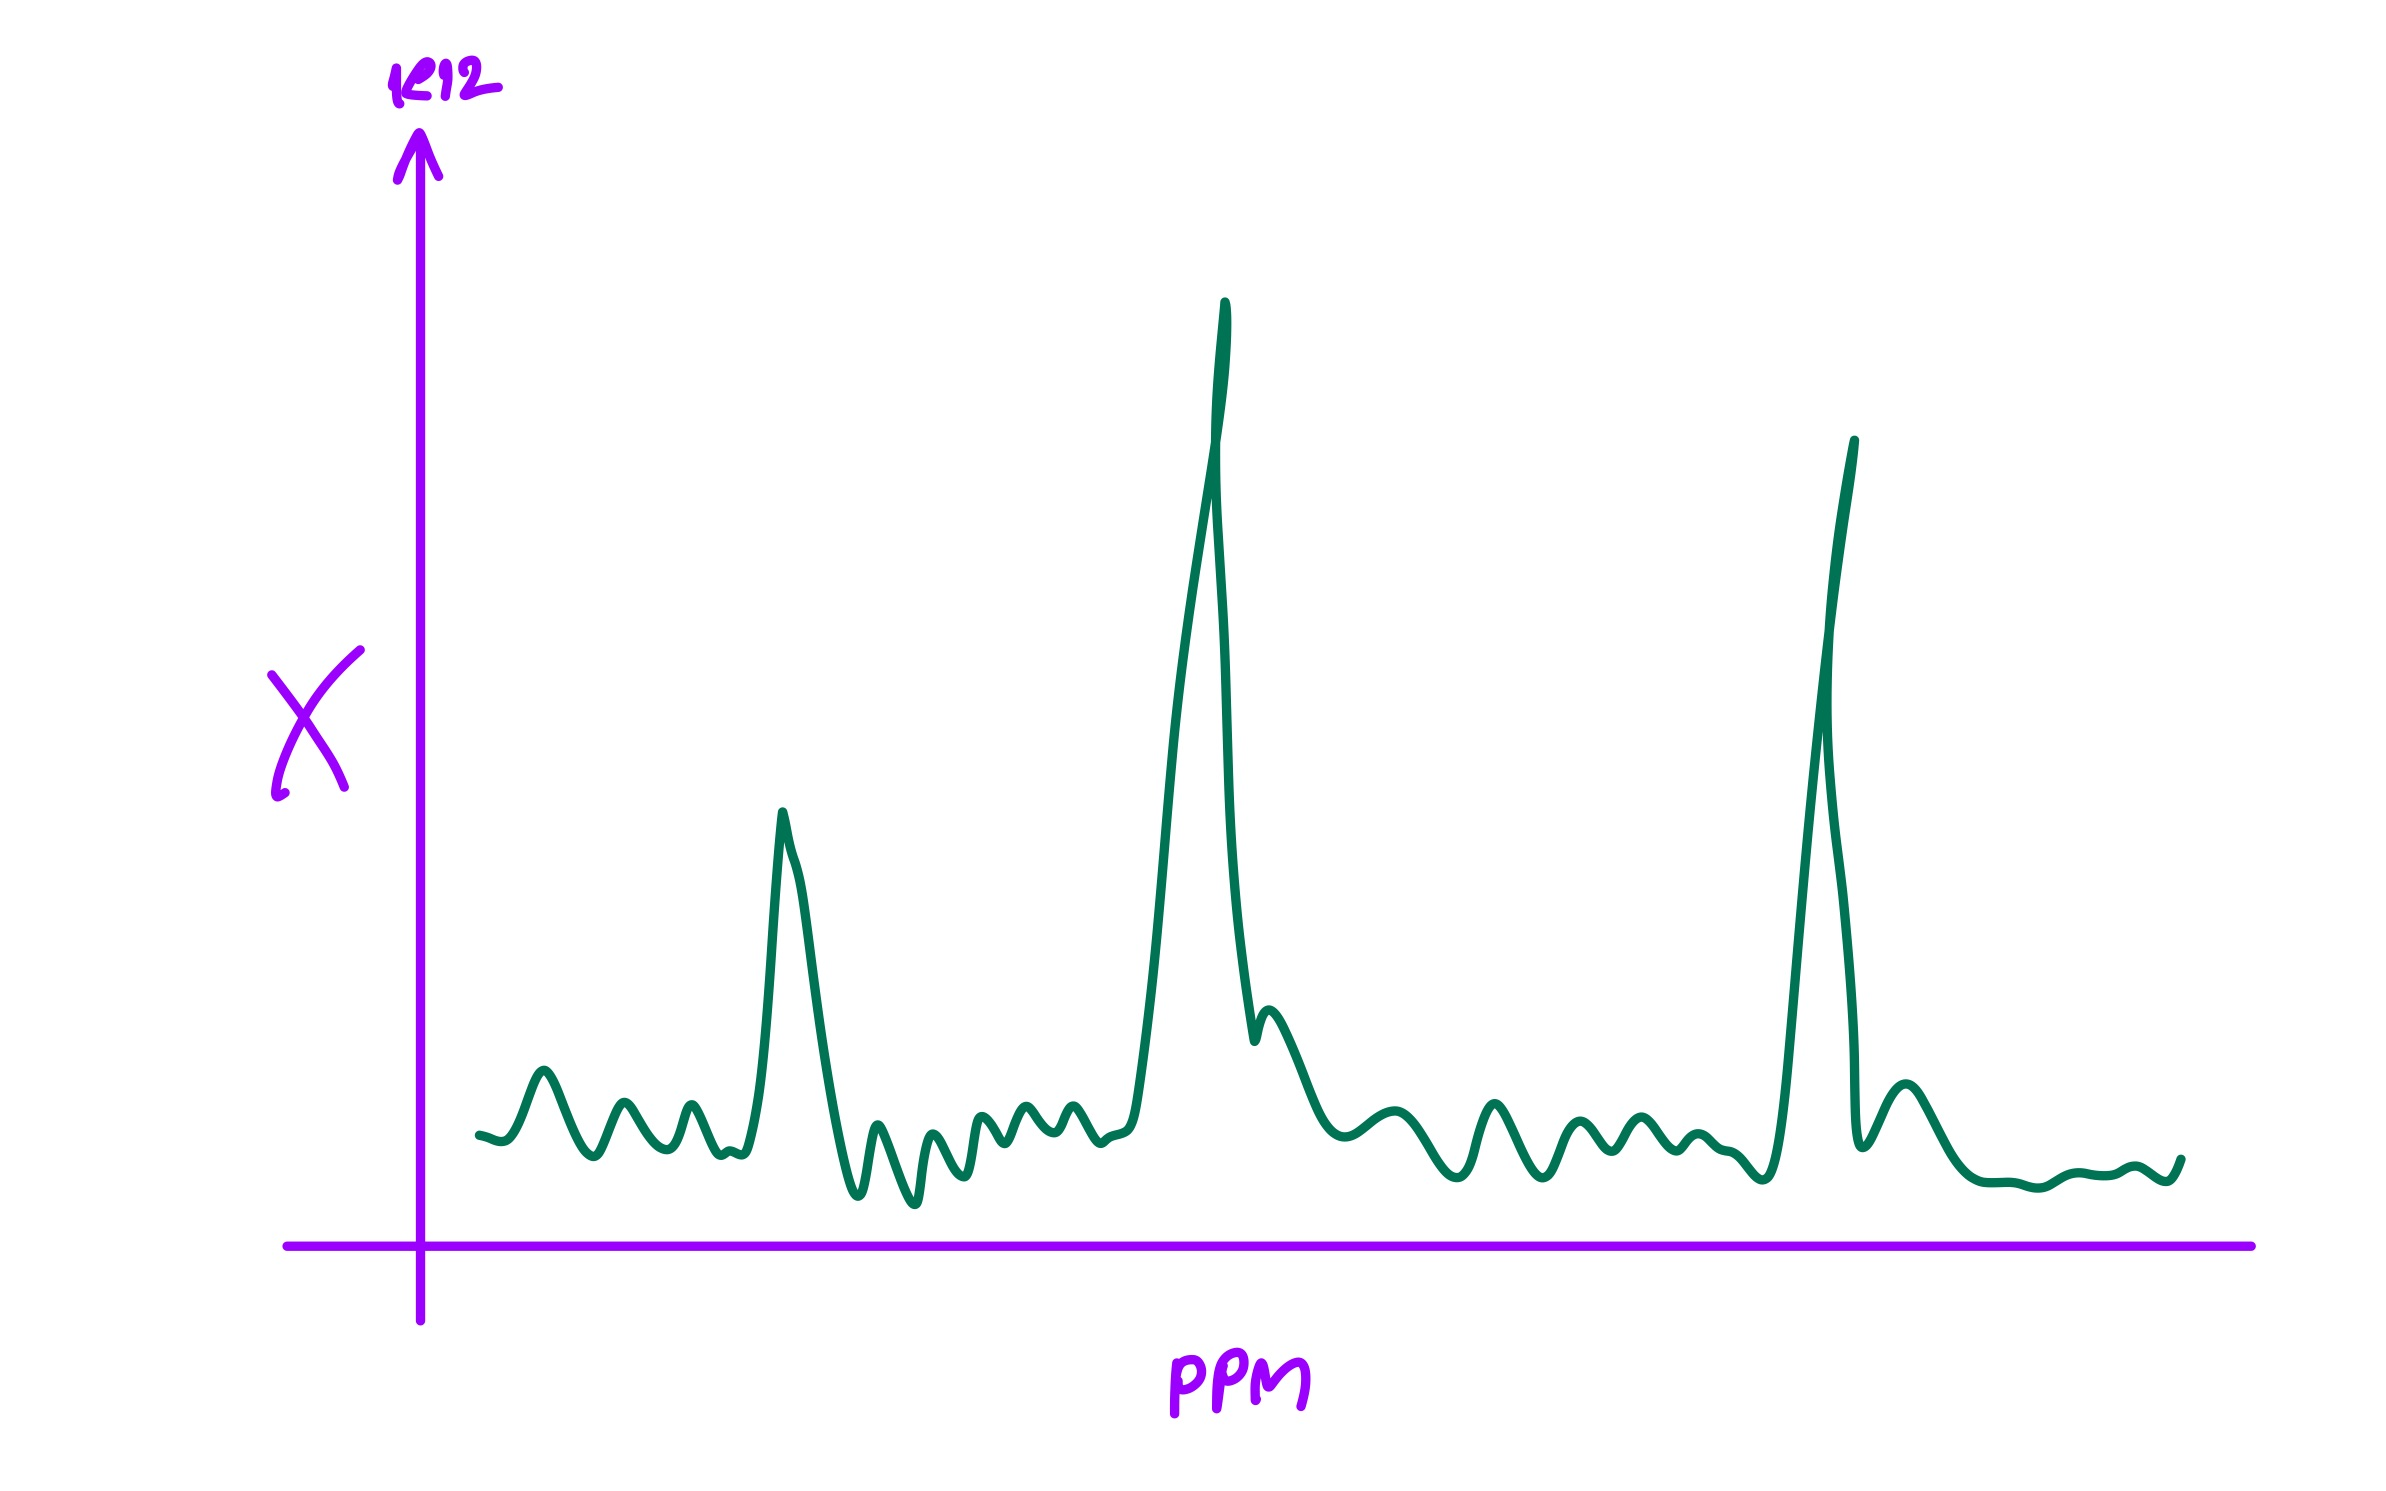

In [71]:
data = pd.read_pickle(path)
data

(array([[ 1.36984969e+07,  1.36904279e+07,  1.27889682e+07, ...,
          1.88668440e+06,  3.11779437e+06,  3.34950400e+06],
        [ 8.55679993e+06,  7.90758455e+06,  7.28975667e+06, ...,
          1.36576000e+06,  1.36576000e+06,  1.36576000e+06],
        [ 4.74035200e+06,  4.74035200e+06,  4.74035200e+06, ...,
         -2.02200274e+06, -2.32252840e+06, -3.07843664e+06],
        ...,
        [ 3.86329400e+07,  3.86329400e+07,  3.86329400e+07, ...,
         -4.37613458e+08, -4.38095321e+08, -4.40187284e+08],
        [ 9.94168277e+05,  9.94168277e+05,  9.94168277e+05, ...,
         -4.62360904e+05,  4.27633911e+05, -1.72847014e+06],
        [-1.41491086e+05, -1.41491086e+05, -1.41491086e+05, ...,
          1.16130230e+07,  1.16073431e+07,  8.35909427e+06]]),
 array([10.87128   , 10.87109488, 10.87090976, ..., -1.26026981,
        -1.26045493, -1.26064005]))

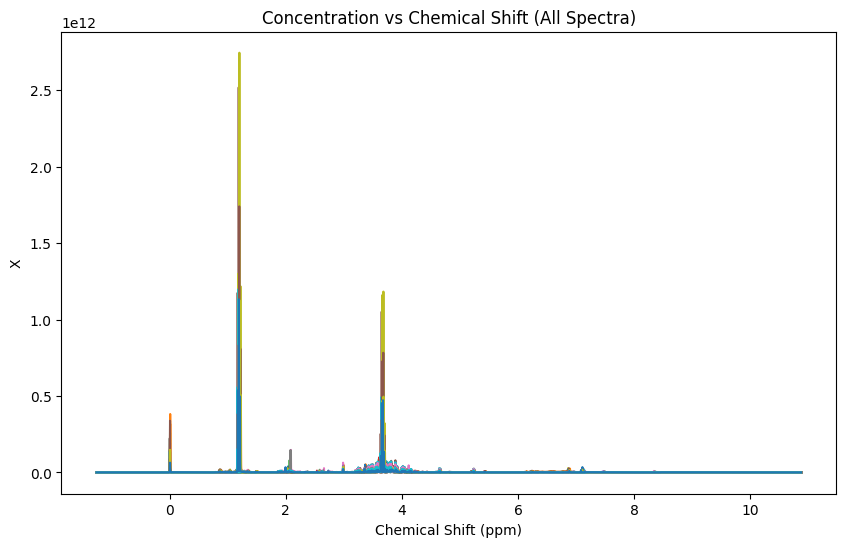

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the data from the pickle file
path = '/content/drive/MyDrive/data_viz_2024_DATA/Xnn_ppm.pickle'
data = pd.read_pickle(path)

# Assuming 'data' is a dictionary or a tuple containing concentration and ppm data:
# For example, if your data is structured like this:
# data = {'concentration': concentration_array, 'ppm': ppm_array}
# or
# data = (concentration_array, ppm_array)

# 1. If 'data' is a dictionary:
if isinstance(data, dict):
  concentration_data = data.get('concentration') # Use .get() to avoid KeyError if key is missing
  ppm_data = data.get('ppm')

# 2. If 'data' is a tuple or list:
elif isinstance(data, (tuple, list)):
  concentration_data = data[0]  # Assuming concentration is the first element
  ppm_data = data[1]          # Assuming ppm is the second element

# 3. If 'data' is a NumPy array and you know the structure:
# You'll need to slice the array to get the concentration and ppm data
# For example, if concentration is in the first 51 rows:
# concentration_data = data[:51]
# ppm_data = data[51:]  # Adjust slicing as needed

# Check if variables are defined
if 'concentration_data' not in locals() or 'ppm_data' not in locals():
  raise ValueError("Could not extract concentration and ppm data from the pickle file.")

# If concentration_data is a 1D array, reshape it to 2D for plotting
if concentration_data.ndim == 1:
    concentration_data = concentration_data.reshape(1, -1)

# Create a single figure and axes
plt.figure(figsize=(10, 6))

# Plot all spectra on the same axes
for i in range(concentration_data.shape[0]):
  plt.plot(ppm_data, concentration_data[i], label=f'Spectrum {i+1}')

# Set labels and title
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('X')
plt.title('Concentration vs Chemical Shift (All Spectra)')

# Show the plot
plt.show()

### ตัดข้อมูล

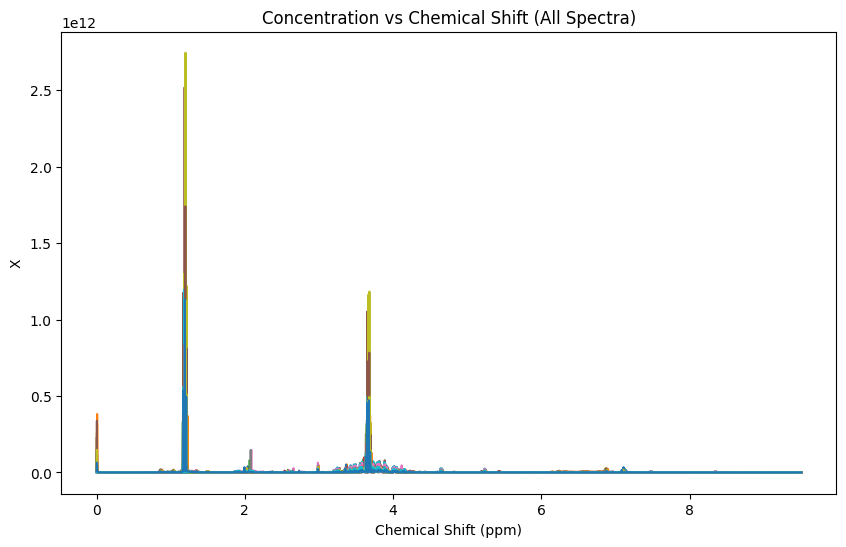

In [85]:
# prompt: 1 ตัด ข้อมูลที่อยู่นอกช่วงที่สนใจ (ppm  ≤  0 และ ppm  ≥  9.5)
# 1. If 'data' is a dictionary:
if isinstance(data, dict):
  concentration_data = data.get('concentration') # Use .get() to avoid KeyError if key is missing
  ppm_data = data.get('ppm')

# 2. If 'data' is a tuple or list:
elif isinstance(data, (tuple, list)):
  concentration_data = data[0]  # Assuming concentration is the first element
  ppm_data = data[1]          # Assuming ppm is the second element

# 3. If 'data' is a NumPy array and you know the structure:
# You'll need to slice the array to get the concentration and ppm data
# For example, if concentration is in the first 51 rows:
# concentration_data = data[:51]
# ppm_data = data[51:]  # Adjust slicing as needed

# Check if variables are defined
if 'concentration_data' not in locals() or 'ppm_data' not in locals():
  raise ValueError("Could not extract concentration and ppm data from the pickle file.")

# Filter data based on ppm range (0 <= ppm <= 9.5)
valid_indices = (ppm_data >= 0) & (ppm_data <= 9.5)
filtered_ppm_data = ppm_data[valid_indices]
filtered_concentration_data = concentration_data[:, valid_indices]  # Assuming concentration is a 2D array

# If concentration_data is a 1D array, reshape it to 2D for plotting
if filtered_concentration_data.ndim == 1:
    filtered_concentration_data = filtered_concentration_data.reshape(1, -1)

# Create a single figure and axes
plt.figure(figsize=(10, 6))

# Plot all spectra on the same axes
for i in range(filtered_concentration_data.shape[0]):
  plt.plot(filtered_ppm_data, filtered_concentration_data[i], label=f'Spectrum {i+1}')

# Set labels and title
plt.xlabel('Chemical Shift (ppm)')
plt.ylabel('X')
plt.title('Concentration vs Chemical Shift (All Spectra)')

# Show the plot
plt.show()

In [92]:
np.shape(filtered_concentration_data) # Get the shape of valid_indices

(51, 51318)

### quantize เหลือ 51x400

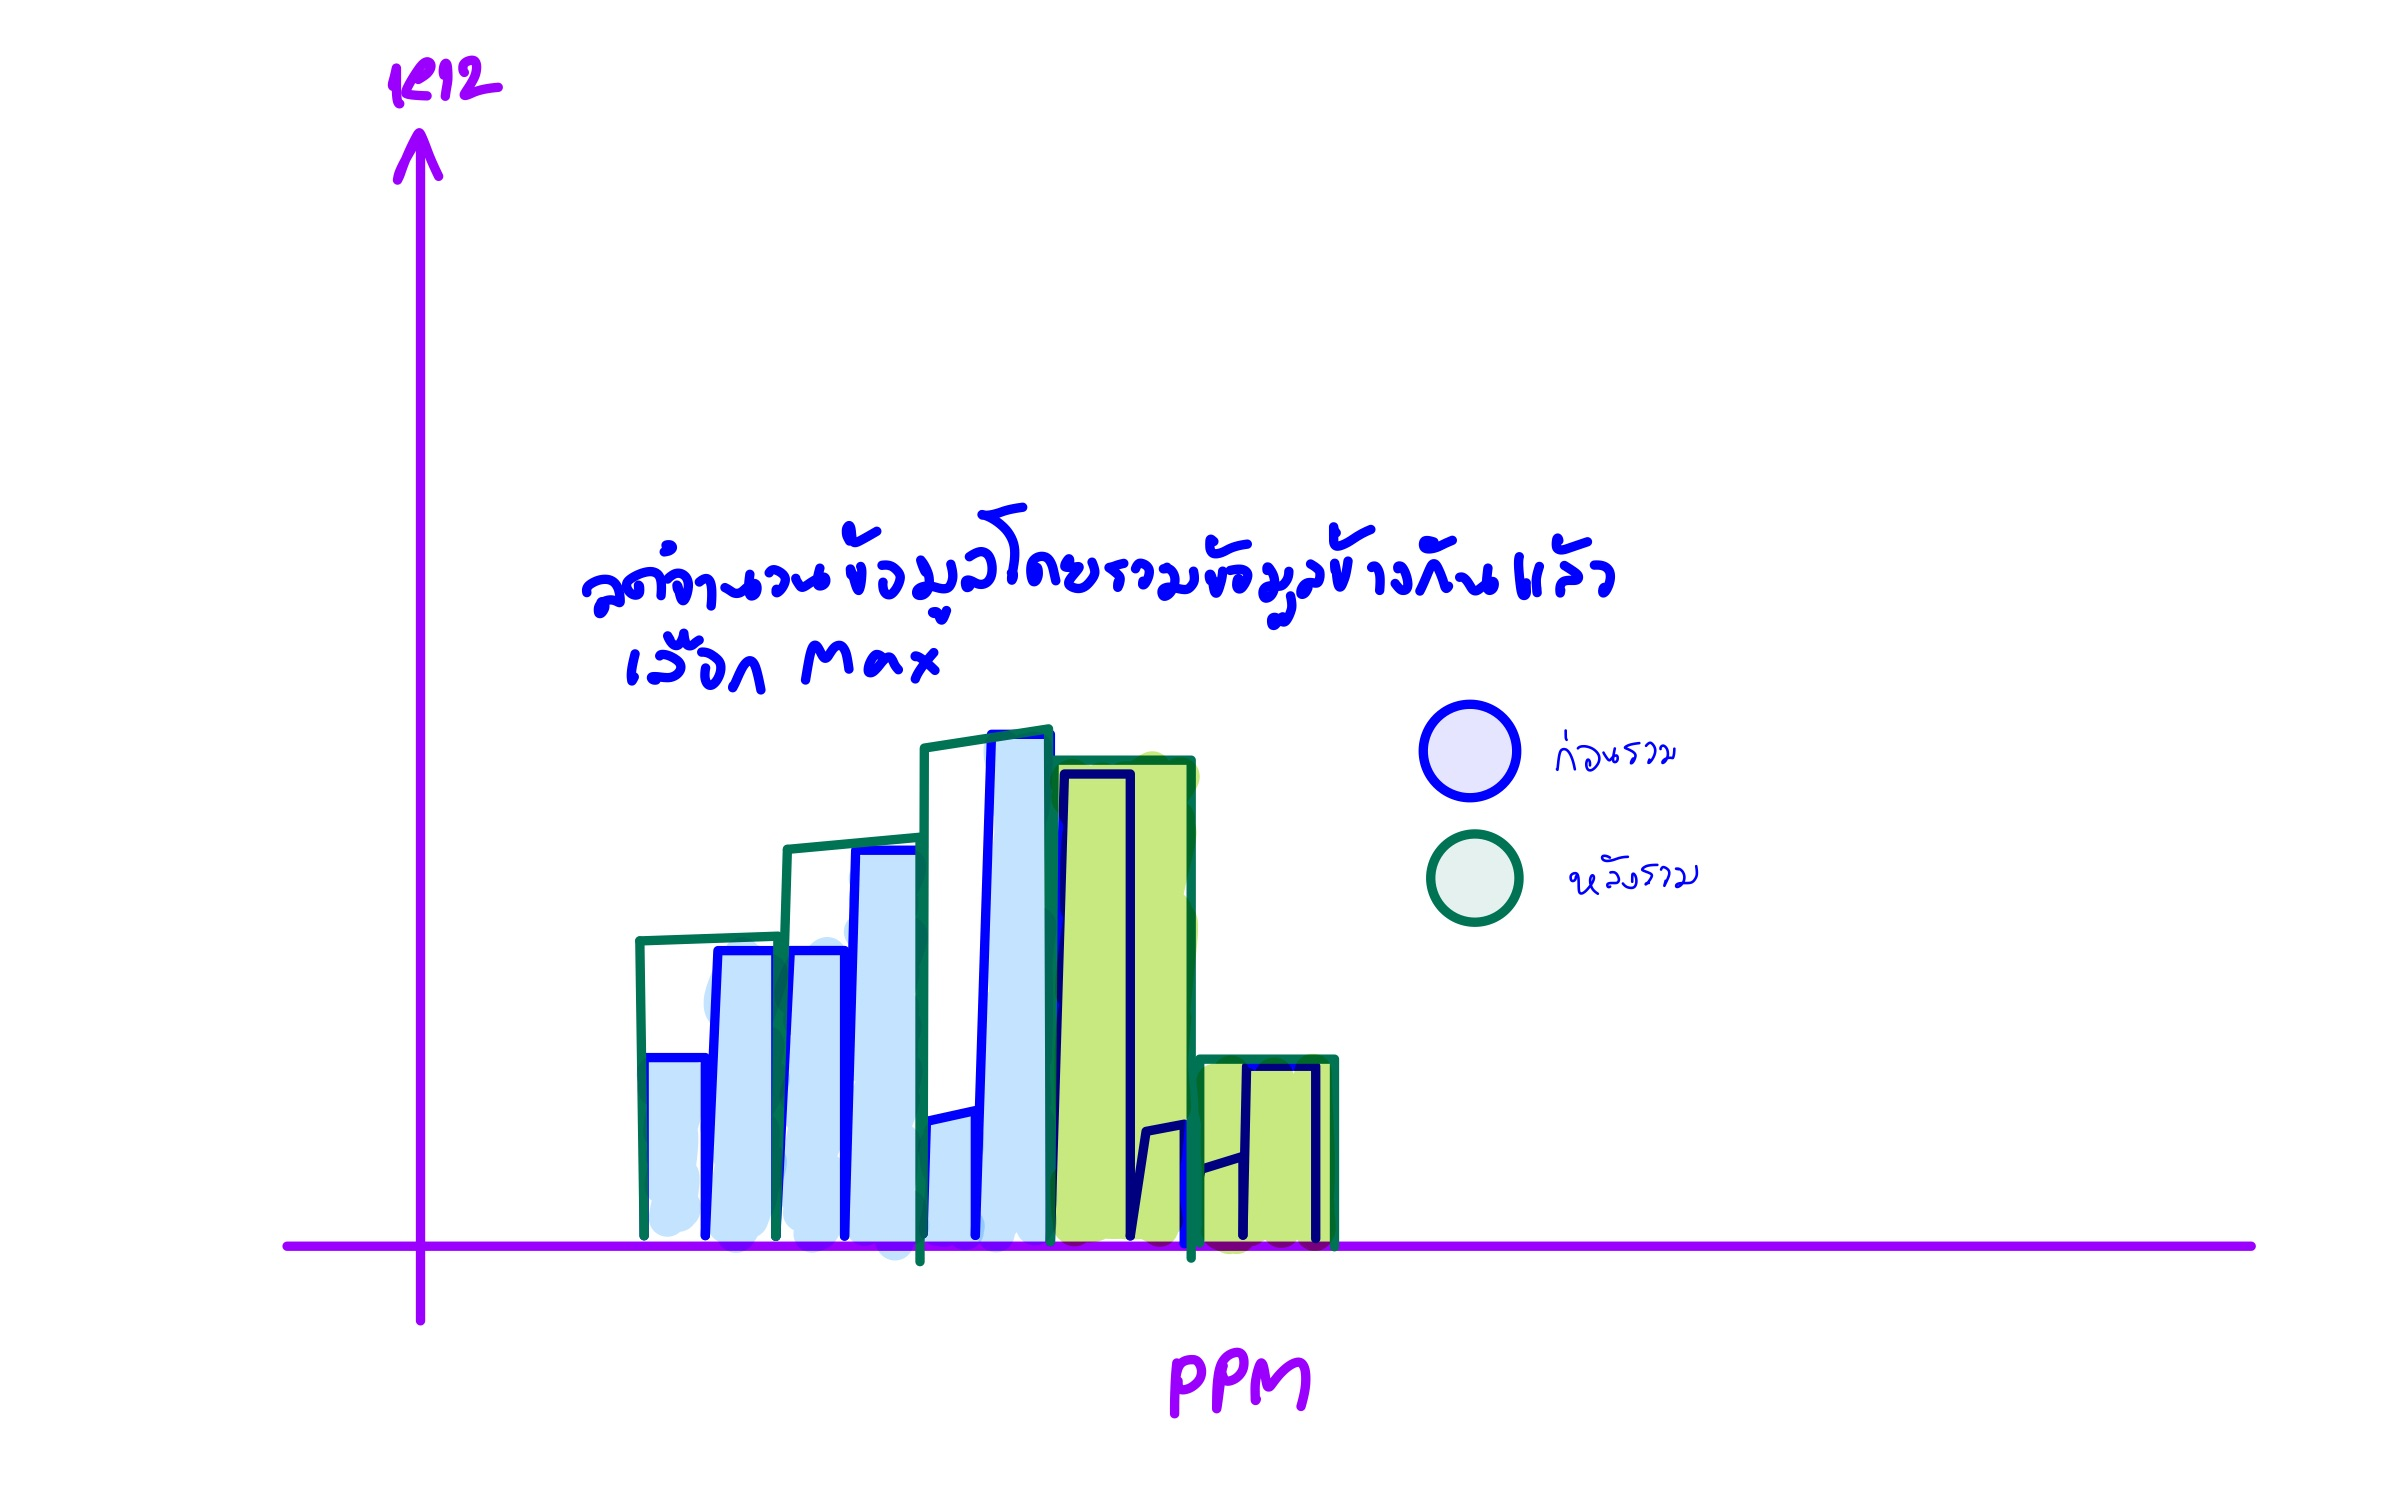

In [105]:
# prompt: 2 quantize ข้อมูลโดยลดจำนวนข้อมูล ให้เหลือเพียง 51 x 400 โดยรวมข้อมูลที่อยู่ข้างกันและเลือกค่า max X

import numpy as np

def quantize_data(concentration_data, ppm_data, new_size_x=51, new_size_y=400):
  """
  Quantizes the input data by reducing the number of data points.

  Args:
    concentration_data: A 2D NumPy array representing the concentration data.
    ppm_data: A 1D NumPy array representing the ppm values.
    new_size_x: The desired number of rows (spectra).
    new_size_y: The desired number of columns (ppm values).

  Returns:
    A tuple containing:
      - quantized_concentration_data: The quantized concentration data.
      - quantized_ppm_data: The quantized ppm data.
  """

  # Calculate the number of data points to combine in each dimension
  combine_x = concentration_data.shape[0] // new_size_x
  combine_y = ppm_data.shape[0] // new_size_y

  # Initialize the quantized data arrays
  quantized_concentration_data = np.zeros((new_size_x, new_size_y))
  quantized_ppm_data = np.zeros(new_size_y)

  # Iterate through the new dimensions
  for i in range(new_size_x):
    for j in range(new_size_y):
      # Combine data points in the original data arrays
      start_x = i * combine_x
      end_x = min((i + 1) * combine_x, concentration_data.shape[0])
      start_y = j * combine_y
      end_y = min((j + 1) * combine_y, ppm_data.shape[0])

      # Find the maximum X value within the combined region
      quantized_concentration_data[i, j] = np.max(concentration_data[start_x:end_x, start_y:end_y])

      # Take the average ppm value for the quantized ppm data
      quantized_ppm_data[j] = np.mean(ppm_data[start_y:end_y])


  return quantized_concentration_data, quantized_ppm_data

# Assuming you have 'concentration_data' and 'ppm_data' defined
# Replace these with your actual data variables

# Quantize the data
new_concentration_data, new_ppm_data = quantize_data(concentration_data, ppm_data, new_size_x=51, new_size_y=400)

# Now you can use 'new_concentration_data' and 'new_ppm_data' for further processing or plotting.
print(np.shape(new_concentration_data))

(51, 400)


## ข้อที่ 1 ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

In [111]:
# prompt: ทำ PCA ข้อมูลเพื่อให้สามารถ visualize ได้

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'new_concentration_data' is your dataset
X = new_concentration_data

# Standardize the data
x = StandardScaler().fit_transform(X)

# Apply PCA with 2 components for visualization
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

## ข้อที่ 2 visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น

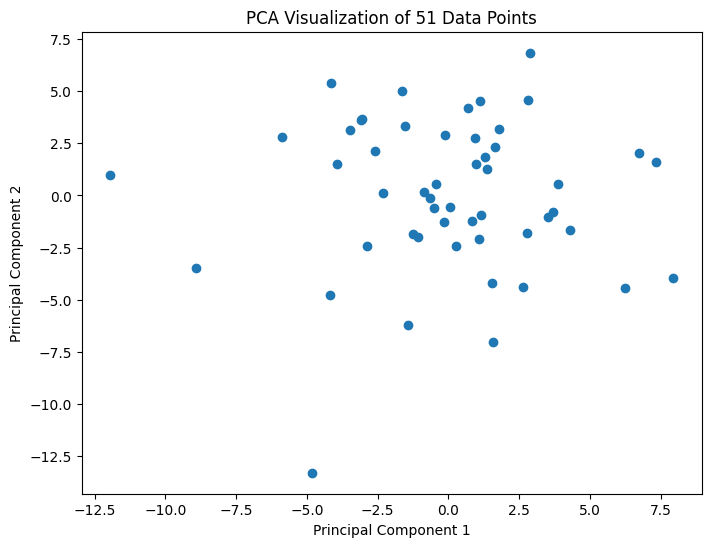

Explained variance ratio: [0.03461243 0.03313678]


In [112]:
# prompt: visualize ข้อมูลทั้ง 51 จุด เพื่อดูการจัดกลุ่มของข้อมูลเบื้องต้น
# Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of 51 Data Points')
plt.show()

# Explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

## ข้อที่ 3 ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี

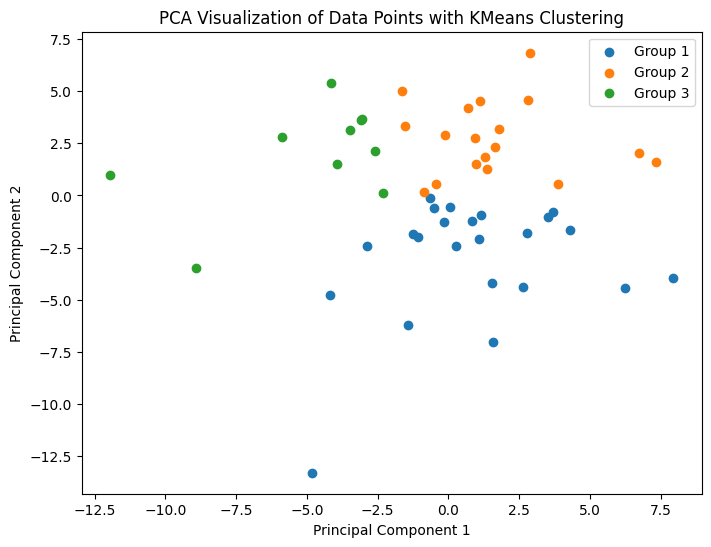

Number of groups: 3


In [113]:
# prompt: ตอบคำถามว่า data มีทั้งหมดกี่กลุ่ม โดย plot จุดข้อมูลแต่ละกลุ่มเป็นคนละสี
kmeans = KMeans(n_clusters=3)  # Try different values of n_clusters
kmeans.fit(principalDf)
labels = kmeans.labels_

# Visualize the results with different colors for each group
plt.figure(figsize=(8, 6))
for i in range(len(set(labels))):
    plt.scatter(principalDf['principal component 1'][labels == i], principalDf['principal component 2'][labels == i], label=f'Group {i+1}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization of Data Points with KMeans Clustering')
plt.legend()
plt.show()


# Print the number of groups
print(f"Number of groups: {len(set(labels))}")


## ข้อที่ 4 สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

In [119]:
# prompt: สร้าง ตารางที่มี column บอกว่า data แต่ละจุดนั้นอยู่กลุ่มไหน

# Create a DataFrame with a column indicating the group for each data point
df_with_groups = pd.DataFrame({'PC1': principalDf['principal component 1'],
                               'PC2': principalDf['principal component 2'],
                               'Group': labels})

# Display the DataFrame with group information
df_with_groups

,PC1,PC2,Group
0,-5.897518,2.801218,2
1,-0.118821,2.887875,1
2,1.549635,-4.217299,0
3,1.365874,1.267475,1
4,-4.138625,5.394717,2
5,0.698857,4.185184,1
6,-1.536398,3.345073,1
7,-8.929195,-3.477665,2
8,-2.862617,-2.411933,0
9,-3.465106,3.141287,2
